In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
def measure_balance(targets):
    from collections import Counter
    import matplotlib.pyplot as plt
    import math
    
    counter = {}
    for column in targets.columns:
        counter[column] = Counter(targets[column])
    
    # Calculate number of subplots needed
    n_cols = len(counter)
    n_rows = 1
    
    # If there are many columns, arrange in a grid
    if n_cols > 4:
        n_rows = math.ceil(n_cols / 4)
        n_cols = min(4, n_cols)
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    
    # Handle case where there's only one subplot
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    # Plot each column's distribution
    for idx, column in enumerate(counter):
        ax = axes[idx] if len(counter) > 1 else axes[0]
        
        values = list(counter[column].keys())
        counts = list(counter[column].values())
        
        # Calculate percentage of targets = 0
        total_count = sum(counts)
        zero_count = counter[column].get(0, 0)
        zero_percentage = (zero_count / total_count) * 100 if total_count > 0 else 0
        
        # Create bar plot
        ax.bar(values, counts)
        ax.set_title(f'{column}\n(0 values: {zero_percentage:.1f}%)')
        ax.set_xlabel("Values")
        ax.set_ylabel("Counts")
        ax.set_xticks(values)
        
        # Add value labels on bars
        for i, (val, count) in enumerate(zip(values, counts)):
            ax.text(val, count + max(counts) * 0.01, str(count), 
                   ha='center', va='bottom')
    
    # Hide unused subplots if any
    if len(counter) < len(axes):
        for idx in range(len(counter), len(axes)):
            axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return counter

In [3]:
def analyze_multilabel_distribution(targets, target_columns):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    from collections import Counter
    
    # Create a subset with only the target columns
    target_data = targets[target_columns].copy()
    
    # Create combination strings for each row
    combinations = []
    for _, row in target_data.iterrows():
        # Get active labels (where value = 1)
        active_labels = [col.replace("suggested_explanation_", "") for col, val in zip(target_columns, row) if val == 1]
        if not active_labels:
            combinations.append("None")
        else:
            combinations.append(", ".join(sorted(active_labels)))
    
    # Count combinations
    combo_counts = Counter(combinations)
    
    # Create figure with subplots
    fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(20, 16))
    
    # 1. Bar plot of all combinations
    combo_items = list(combo_counts.items())
    combo_items.sort(key=lambda x: x[1], reverse=True)  # Sort by frequency
    
    combo_labels, combo_values = zip(*combo_items) if combo_items else ([], [])
    
    bars = ax1.bar(range(len(combo_labels)), combo_values)
    ax1.set_title(f'Distribution of Label Combinations (Total: {len(combinations)} samples)')
    ax1.set_xlabel('Label Combinations')
    ax1.set_ylabel('Count')
    ax1.set_xticks(range(len(combo_labels)))
    ax1.set_xticklabels(combo_labels, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, value in zip(bars, combo_values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(combo_values) * 0.01,
                str(value), ha='center', va='bottom')
    
    # 2. Individual label frequency
    label_counts = {}
    short_names = [col.replace("suggested_explanation_", "") for col in target_columns]
    for col, short_name in zip(target_columns, short_names):
        label_counts[short_name] = target_data[col].sum()
    
    labels, counts = zip(*sorted(label_counts.items(), key=lambda x: x[1], reverse=True))
    bars2 = ax2.bar(labels, counts)
    ax2.set_title('Individual Label Frequencies')
    ax2.set_xlabel('Labels')
    ax2.set_ylabel('Count')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add percentage labels
    total_samples = len(target_data)
    for bar, count in zip(bars2, counts):
        percentage = (count / total_samples) * 100
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts) * 0.01,
                f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')
    
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("="*60)
    print("MULTI-LABEL DISTRIBUTION SUMMARY")
    print("="*60)
    print(f"Total samples: {total_samples}")
    print(f"Total unique combinations: {len(combo_counts)}")
    print(f"Most common combination: {combo_items[0][0]} ({combo_items[0][1]} samples, {combo_items[0][1]/total_samples*100:.1f}%)")
    print()
    
    print("Top 10 combinations:")
    for combo, count in combo_items[:10]:
        percentage = (count / total_samples) * 100
        print(f"  {combo}: {count} ({percentage:.1f}%)")
    
    return {
        'combination_counts': combo_counts,
        'label_counts': label_counts,
        'combinations_list': combinations
    }

# Usage example:
# target_columns = ["suggested_explanation_Rules", "suggested_explanation_Exemplars", 
#                   "suggested_explanation_FI", "suggested_explanation_Counterexamples", 
#                   "suggested_explanation_Counterfactual", "suggested_explanation_Confidence"]
# results = analyze_multilabel_distribution(your_dataframe, target_columns)

In [4]:
target_columns = ["suggested_explanation_Rules", "suggested_explanation_Exemplars", "suggested_explanation_FI", "suggested_explanation_Counterexamples", "suggested_explanation_Counterfactual", "suggested_explanation_Confidence"]

# Adult

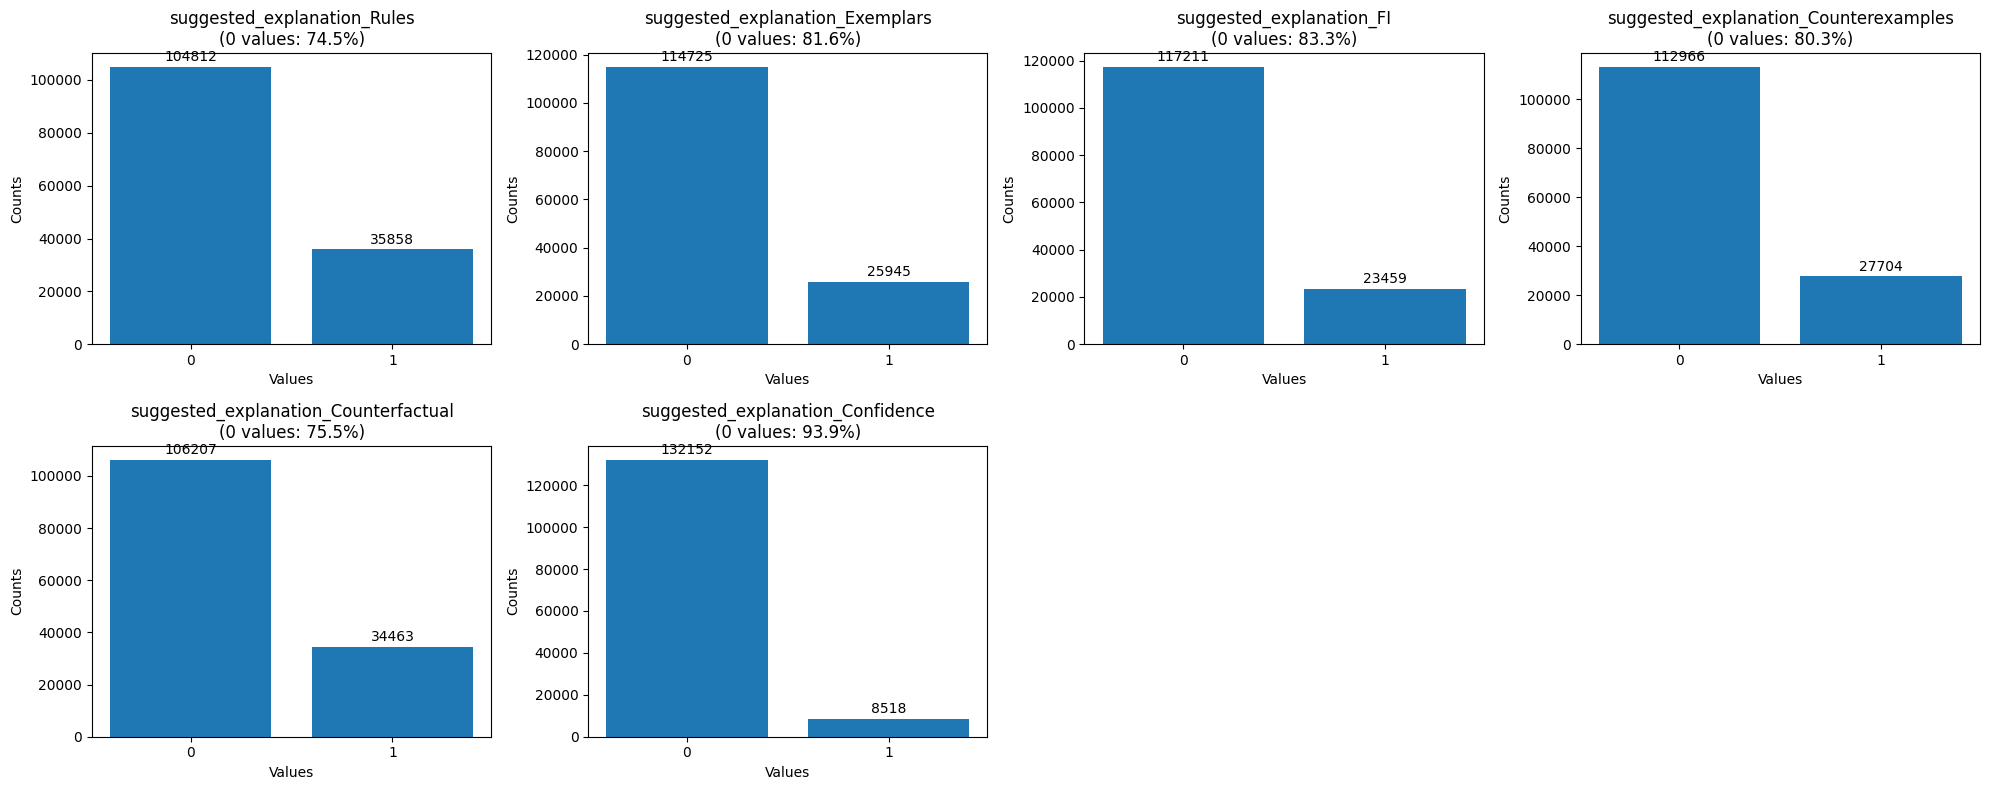

In [5]:
df = pd.read_csv("./data/train_adult_simpler.csv")
counter = measure_balance(df[target_columns])

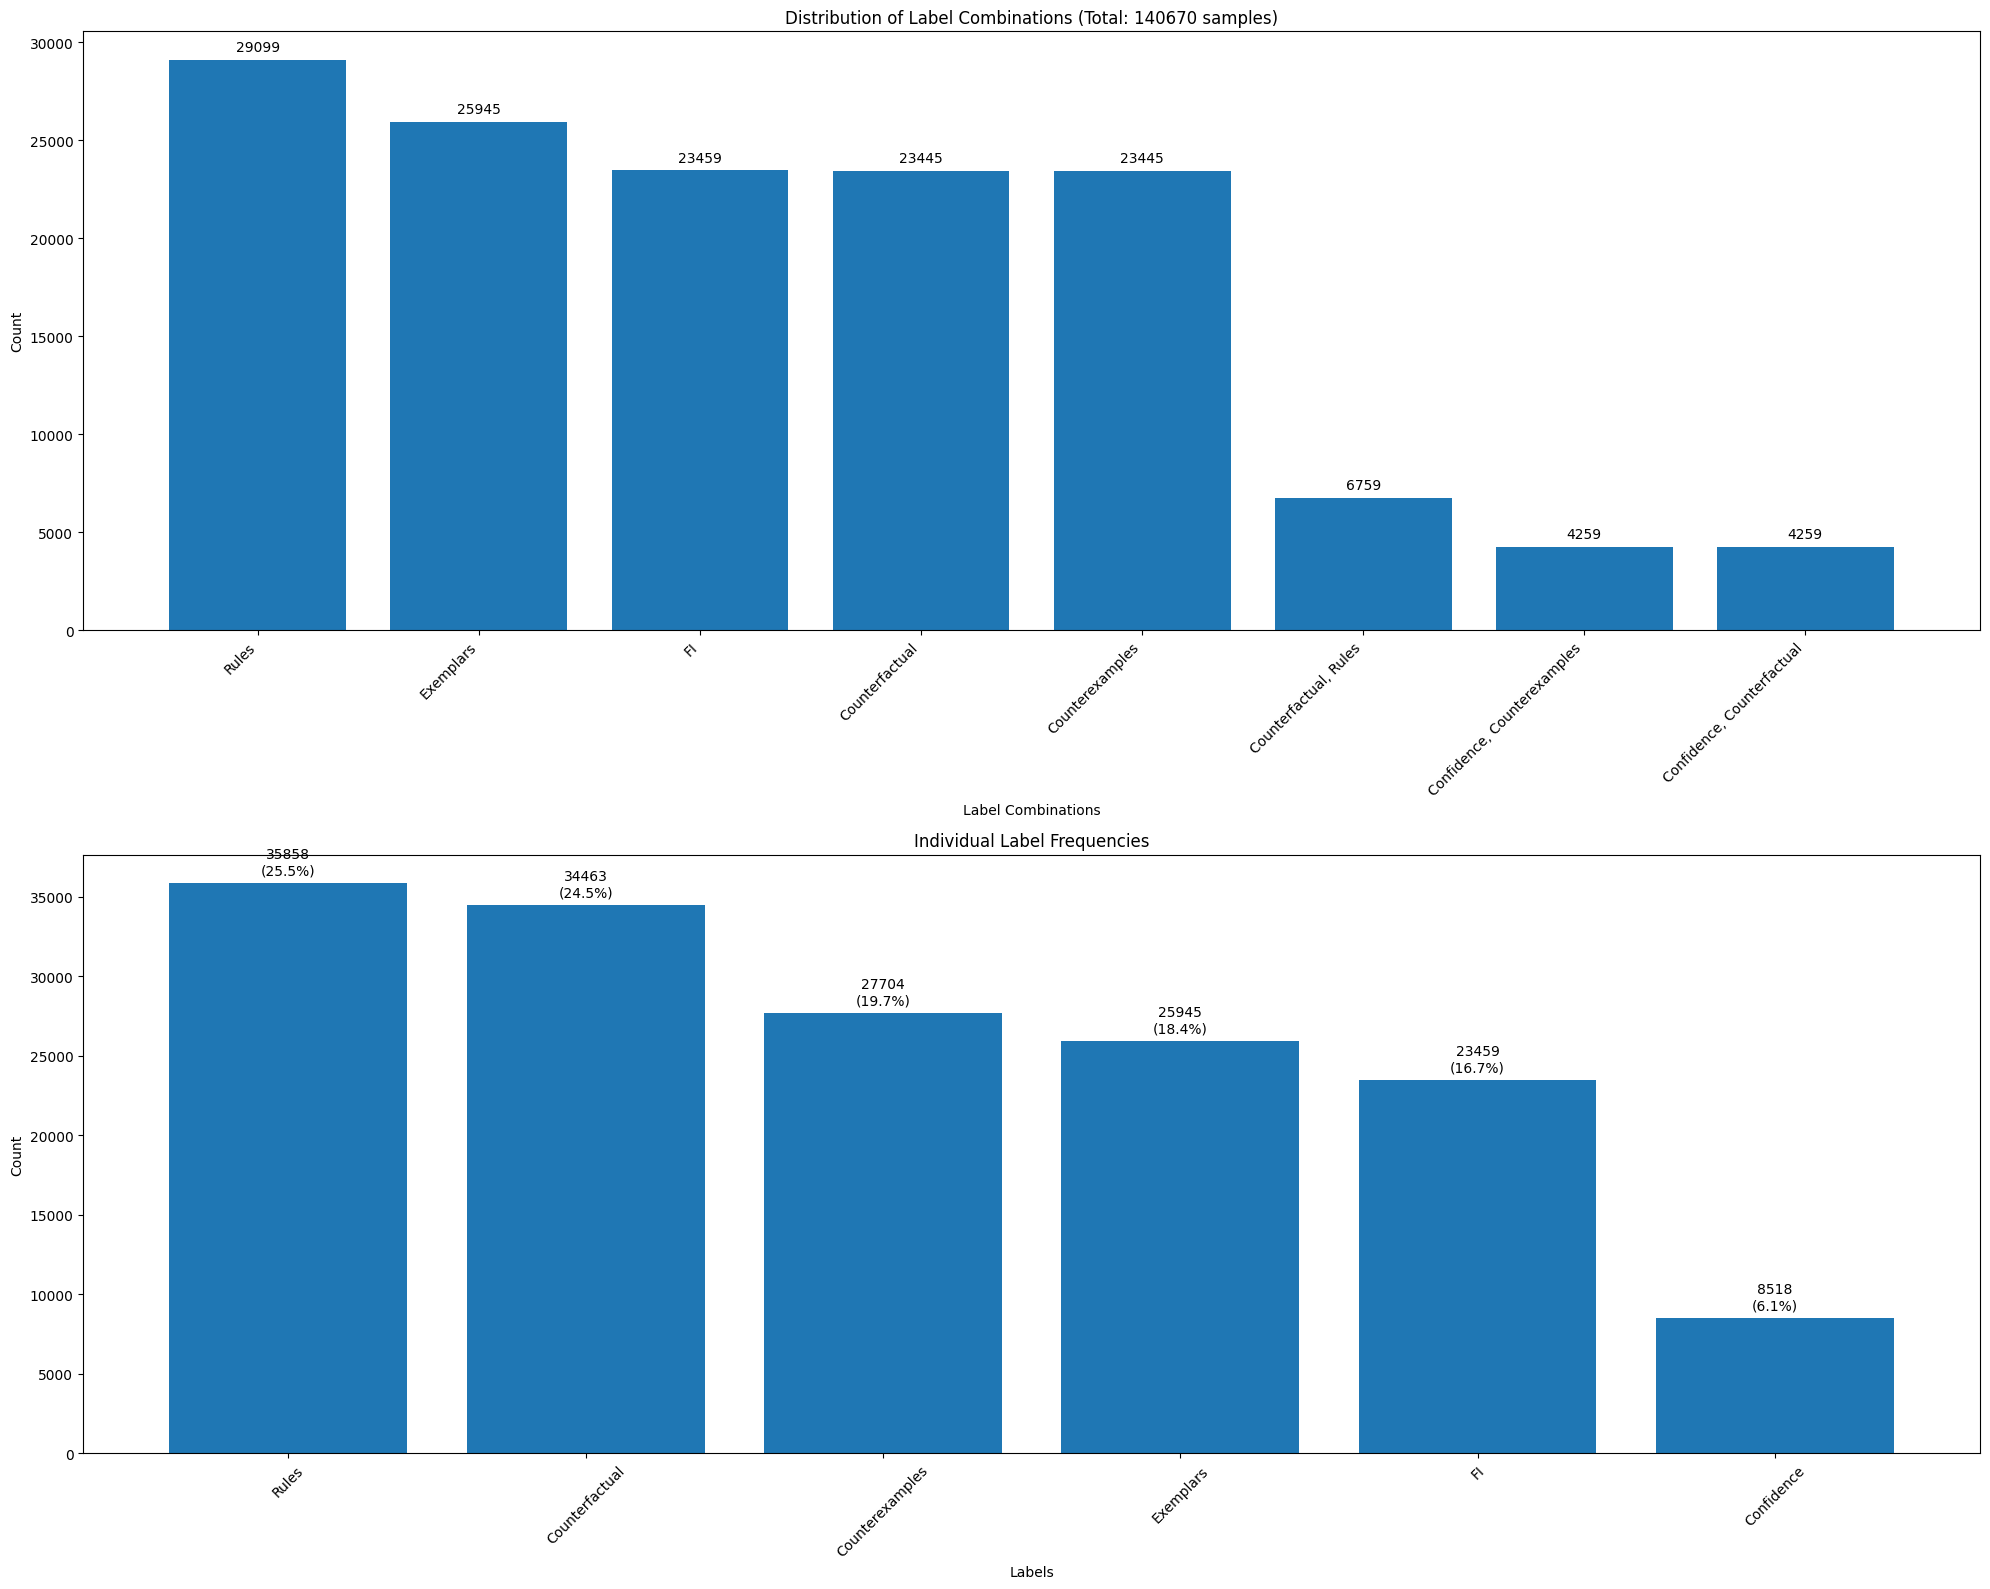

MULTI-LABEL DISTRIBUTION SUMMARY
Total samples: 140670
Total unique combinations: 8
Most common combination: Rules (29099 samples, 20.7%)

Top 10 combinations:
  Rules: 29099 (20.7%)
  Exemplars: 25945 (18.4%)
  FI: 23459 (16.7%)
  Counterfactual: 23445 (16.7%)
  Counterexamples: 23445 (16.7%)
  Counterfactual, Rules: 6759 (4.8%)
  Confidence, Counterexamples: 4259 (3.0%)
  Confidence, Counterfactual: 4259 (3.0%)


In [6]:
target_columns = ["suggested_explanation_Rules", "suggested_explanation_Exemplars", 
                  "suggested_explanation_FI", "suggested_explanation_Counterexamples", 
                  "suggested_explanation_Counterfactual", "suggested_explanation_Confidence"]

results = analyze_multilabel_distribution(df, target_columns)

# Dutch

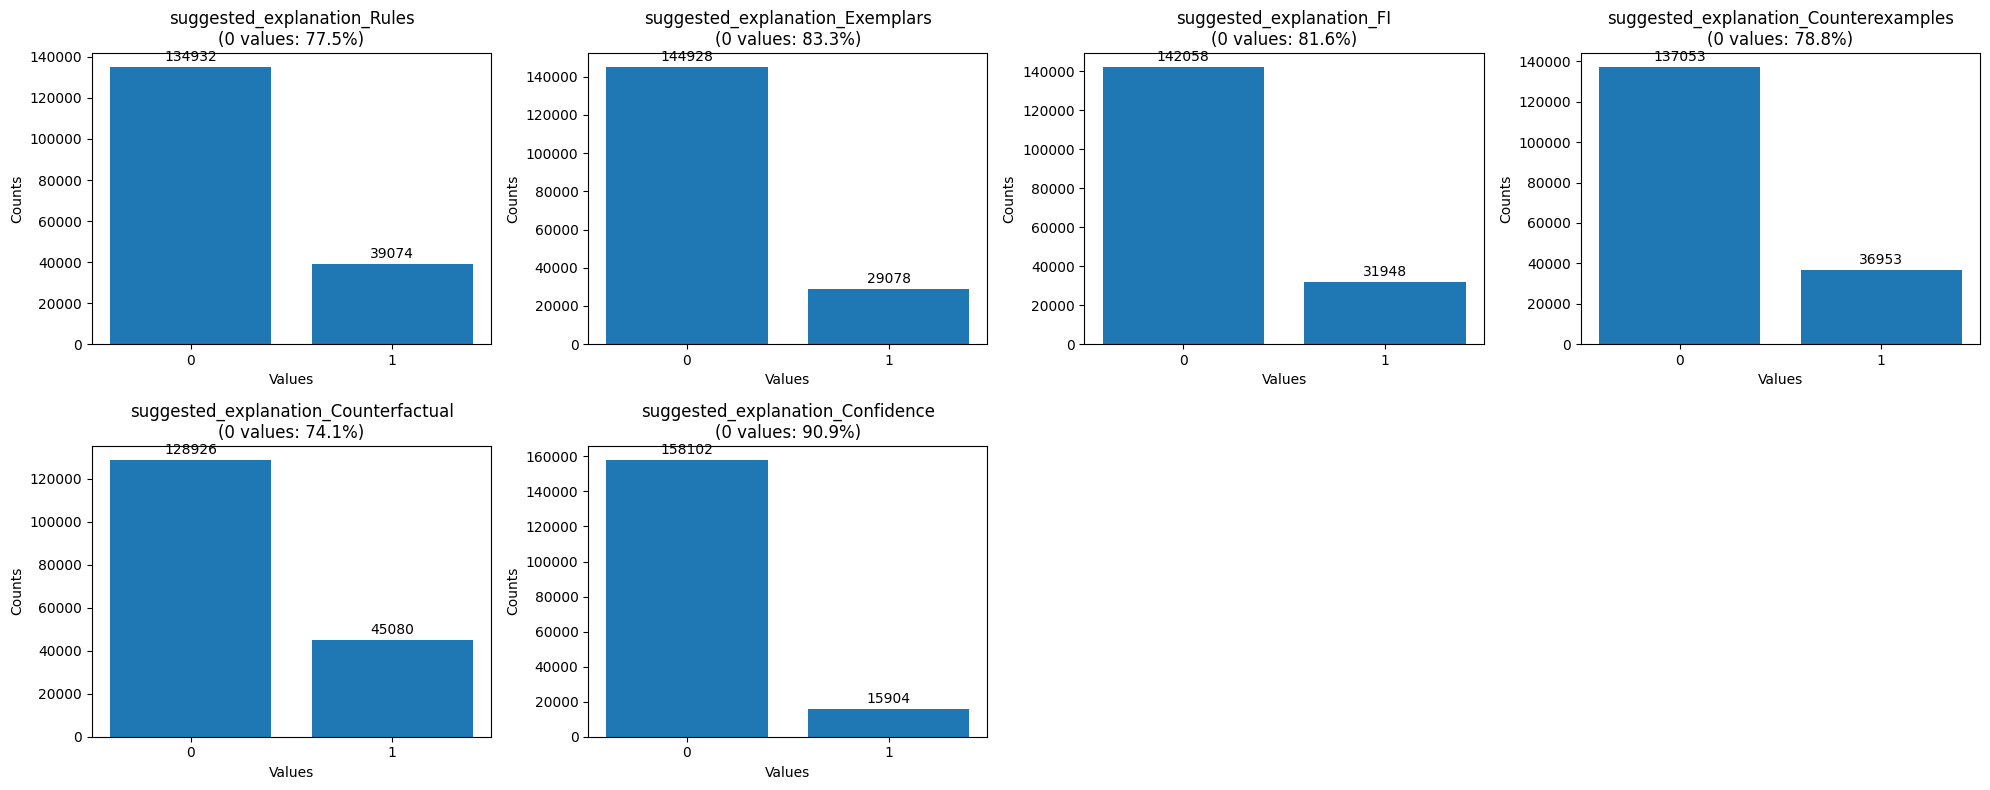

In [7]:
df = pd.read_csv("./data/train_dutch_simpler.csv")
counter = measure_balance(df[target_columns])

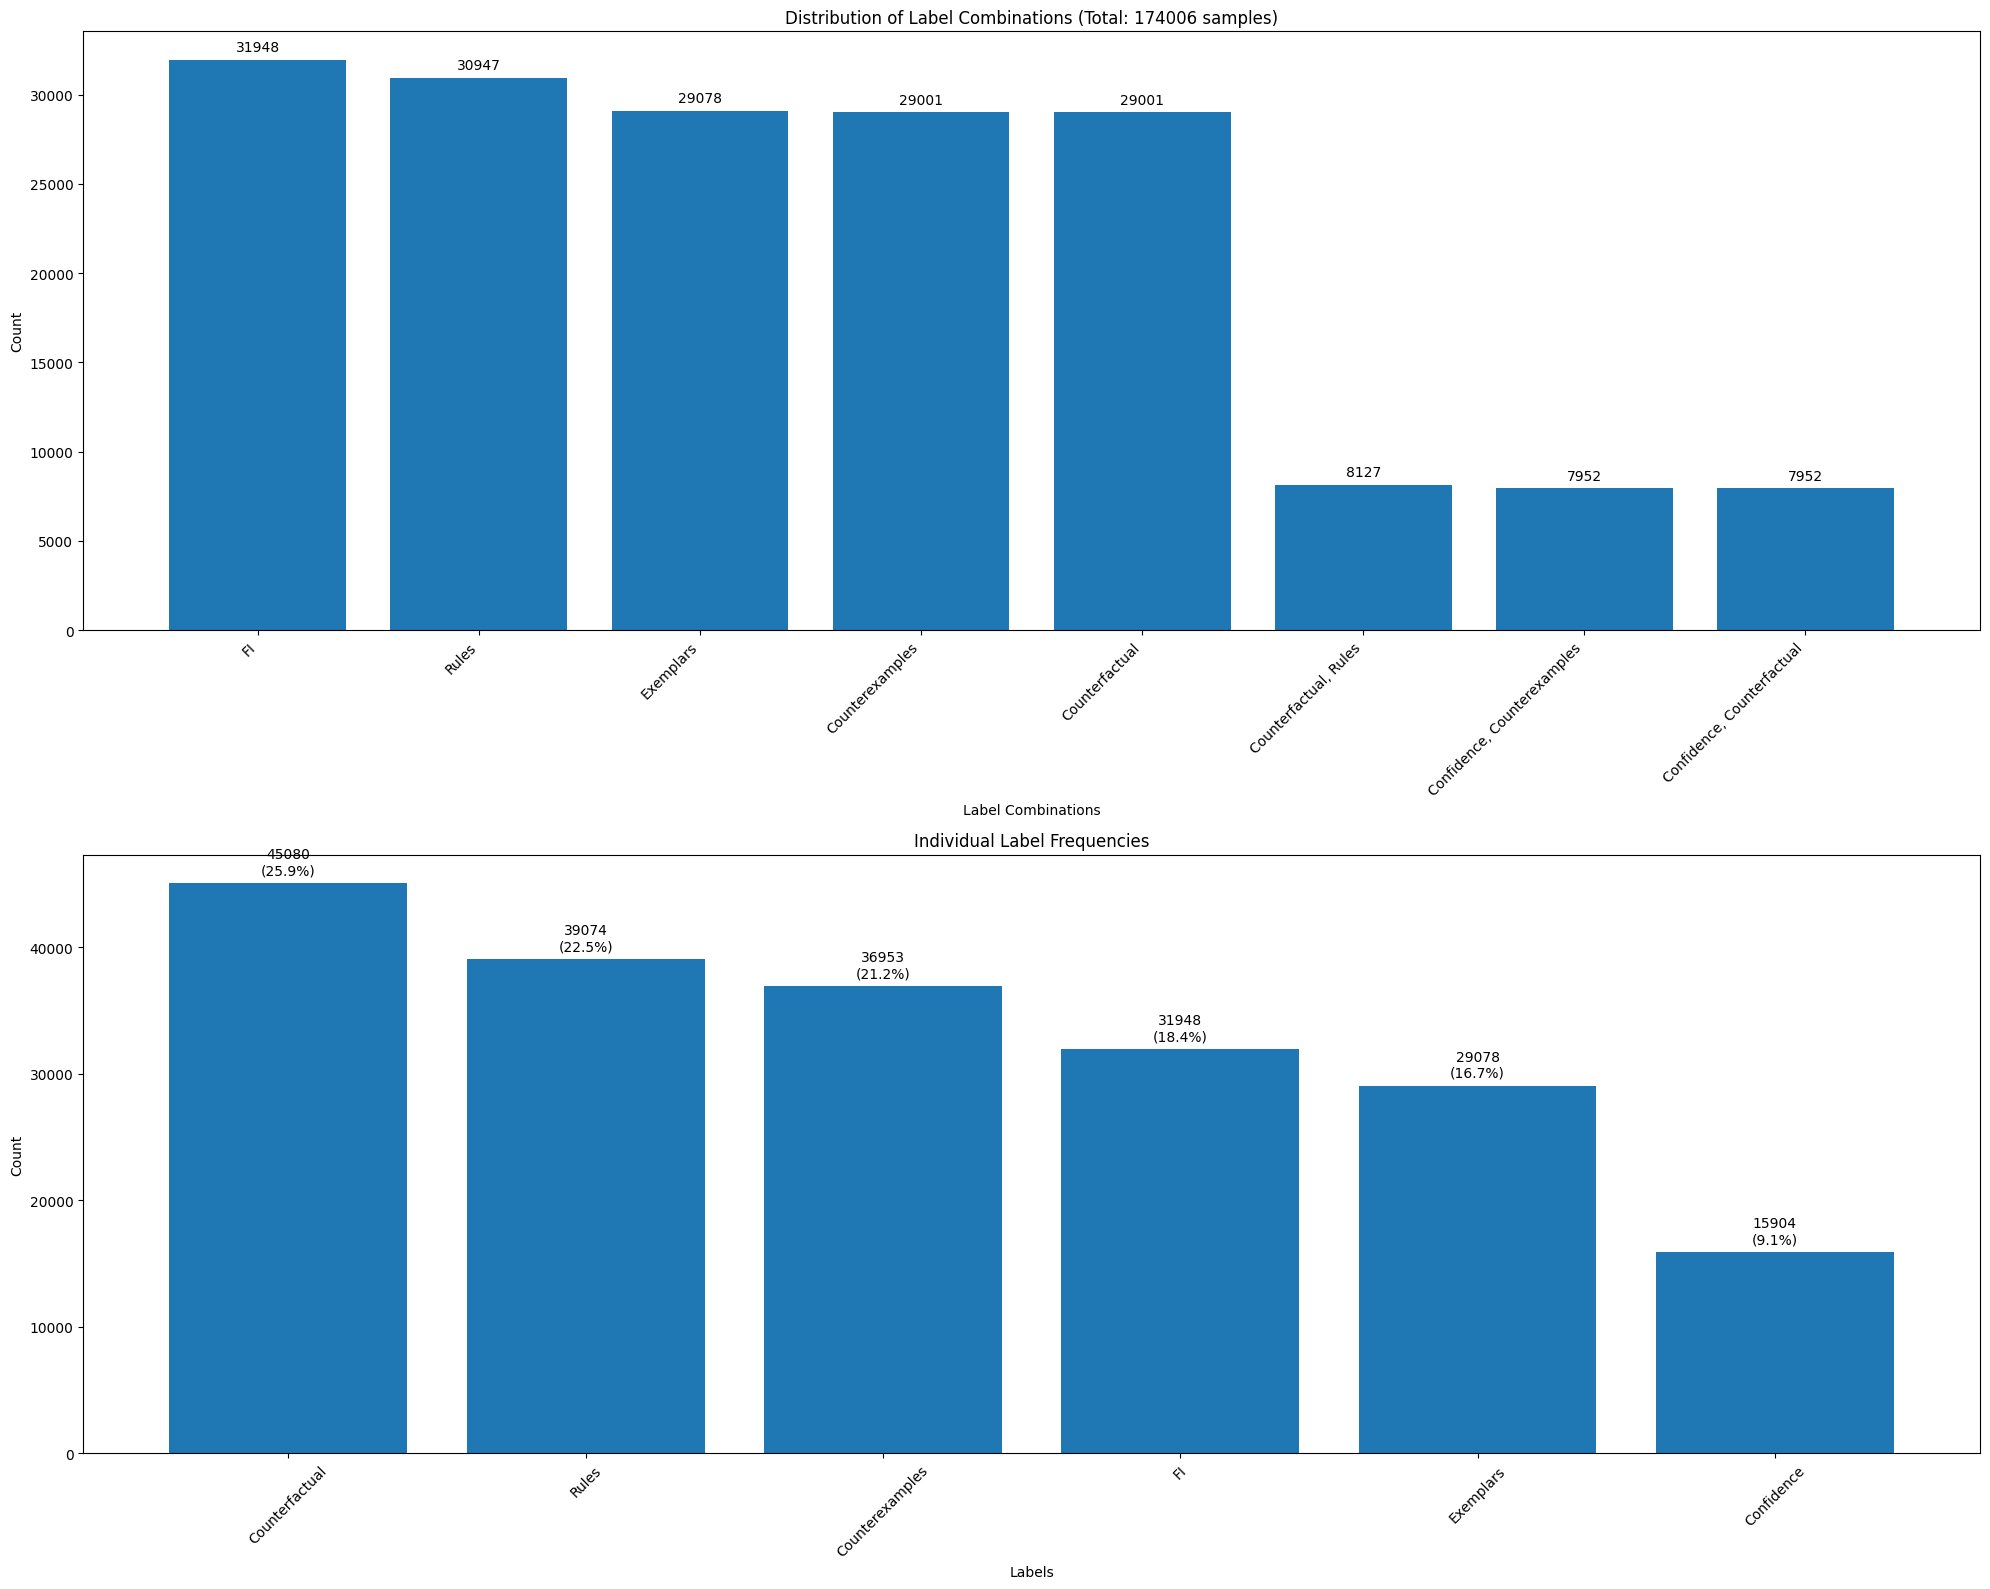

MULTI-LABEL DISTRIBUTION SUMMARY
Total samples: 174006
Total unique combinations: 8
Most common combination: FI (31948 samples, 18.4%)

Top 10 combinations:
  FI: 31948 (18.4%)
  Rules: 30947 (17.8%)
  Exemplars: 29078 (16.7%)
  Counterexamples: 29001 (16.7%)
  Counterfactual: 29001 (16.7%)
  Counterfactual, Rules: 8127 (4.7%)
  Confidence, Counterexamples: 7952 (4.6%)
  Confidence, Counterfactual: 7952 (4.6%)


In [8]:
target_columns = ["suggested_explanation_Rules", "suggested_explanation_Exemplars", 
                  "suggested_explanation_FI", "suggested_explanation_Counterexamples", 
                  "suggested_explanation_Counterfactual", "suggested_explanation_Confidence"]

results = analyze_multilabel_distribution(df, target_columns)

# House 16

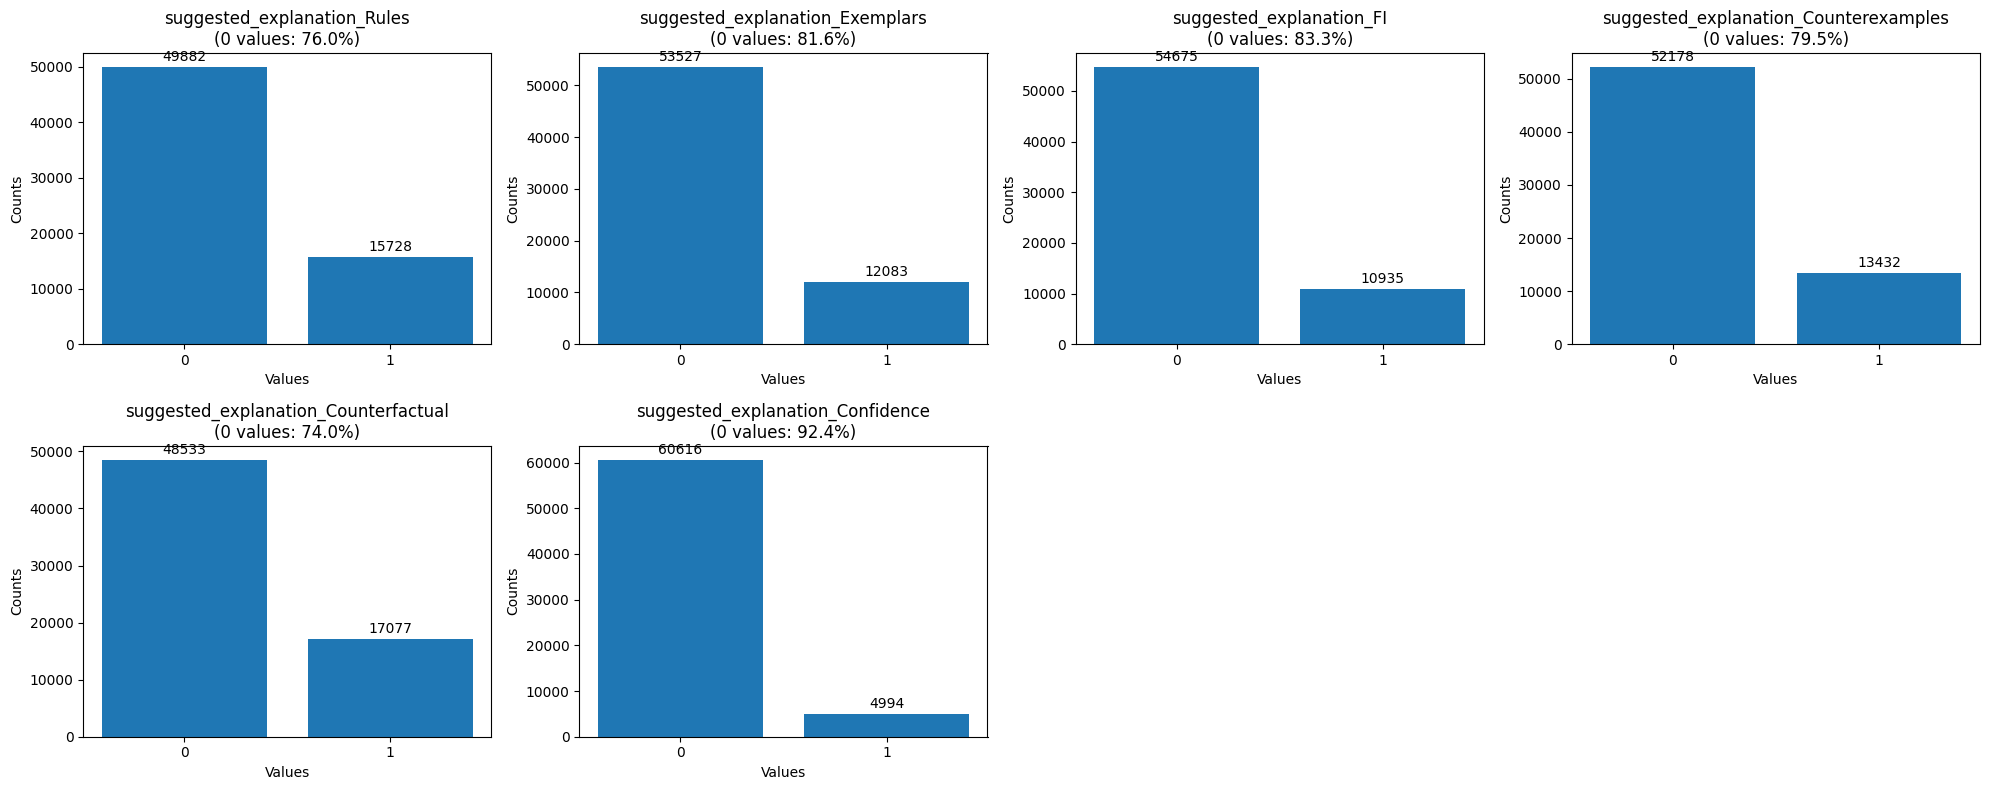

In [9]:
df = pd.read_csv("./data/train_house16.csv")
counter = measure_balance(df[target_columns])

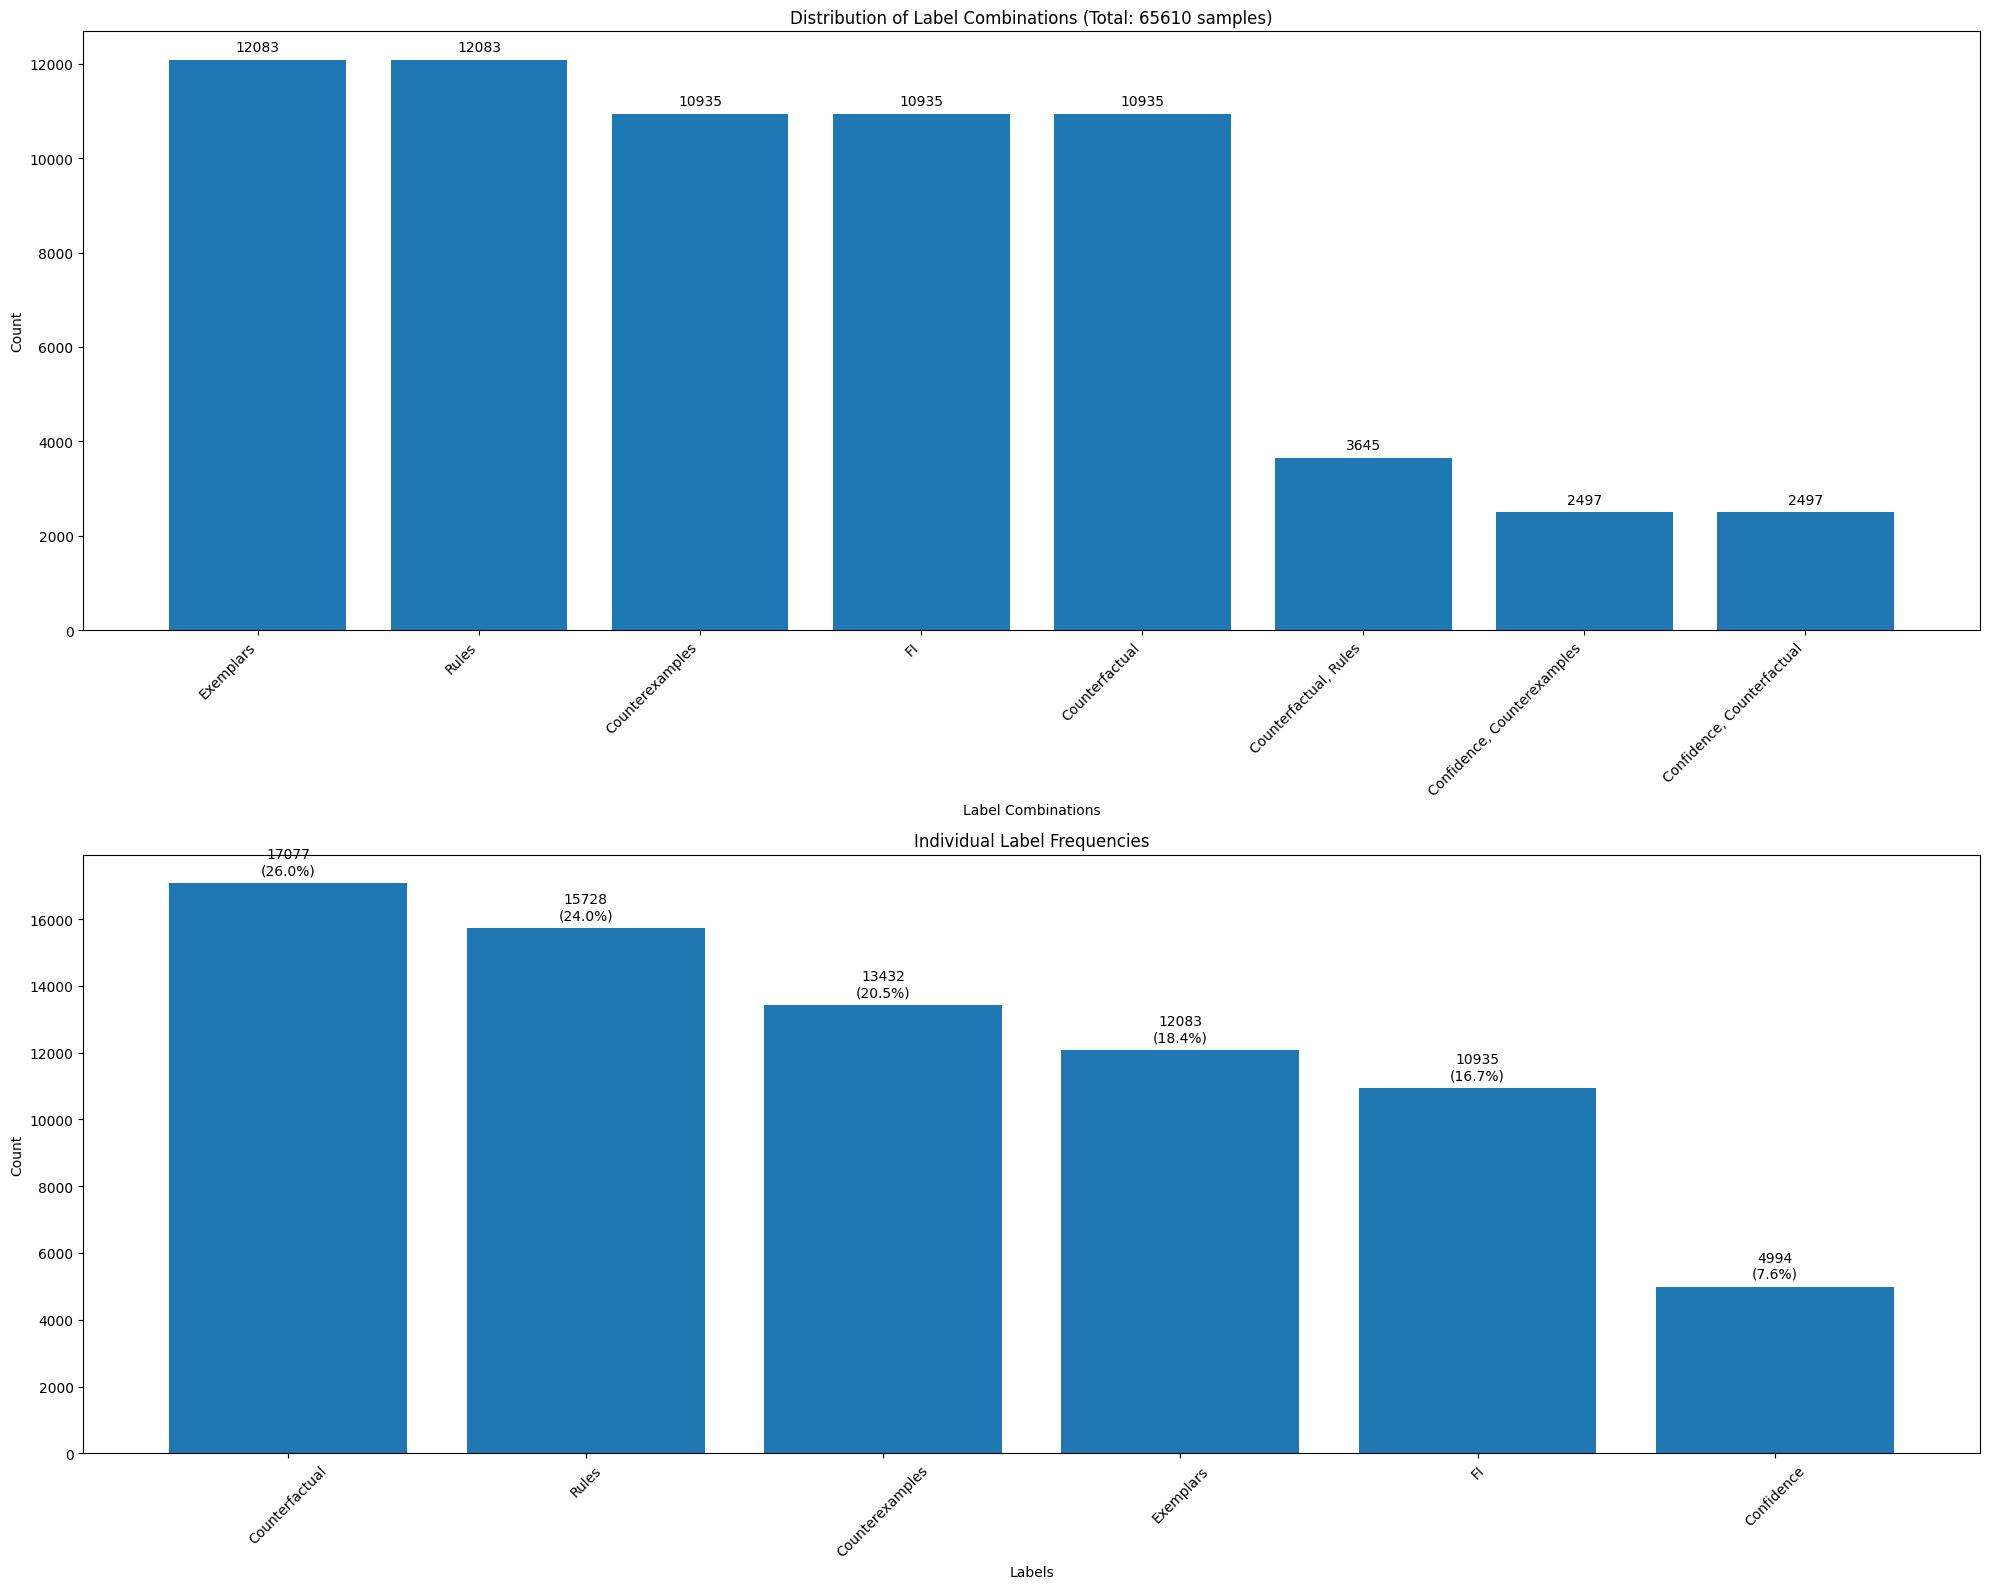

MULTI-LABEL DISTRIBUTION SUMMARY
Total samples: 65610
Total unique combinations: 8
Most common combination: Exemplars (12083 samples, 18.4%)

Top 10 combinations:
  Exemplars: 12083 (18.4%)
  Rules: 12083 (18.4%)
  Counterexamples: 10935 (16.7%)
  FI: 10935 (16.7%)
  Counterfactual: 10935 (16.7%)
  Counterfactual, Rules: 3645 (5.6%)
  Confidence, Counterexamples: 2497 (3.8%)
  Confidence, Counterfactual: 2497 (3.8%)


In [10]:
target_columns = ["suggested_explanation_Rules", "suggested_explanation_Exemplars", 
                  "suggested_explanation_FI", "suggested_explanation_Counterexamples", 
                  "suggested_explanation_Counterfactual", "suggested_explanation_Confidence"]

results = analyze_multilabel_distribution(df, target_columns)

# Shuttle

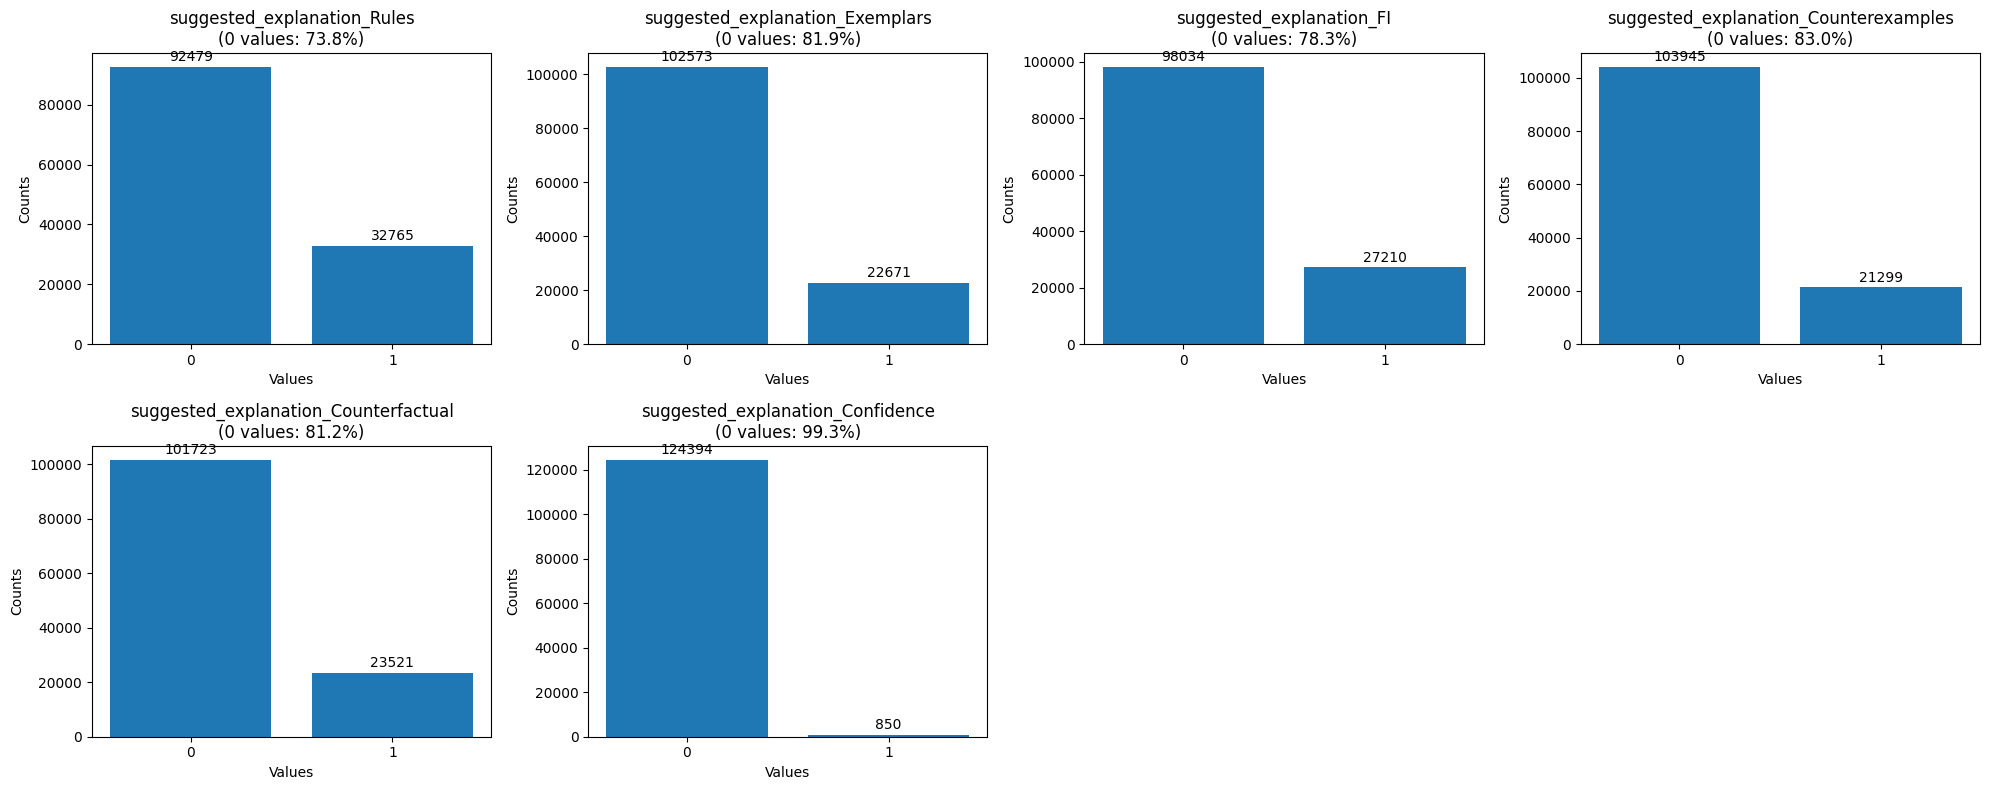

In [11]:
df = pd.read_csv("./data/train_shuttle.csv")
counter = measure_balance(df[target_columns])

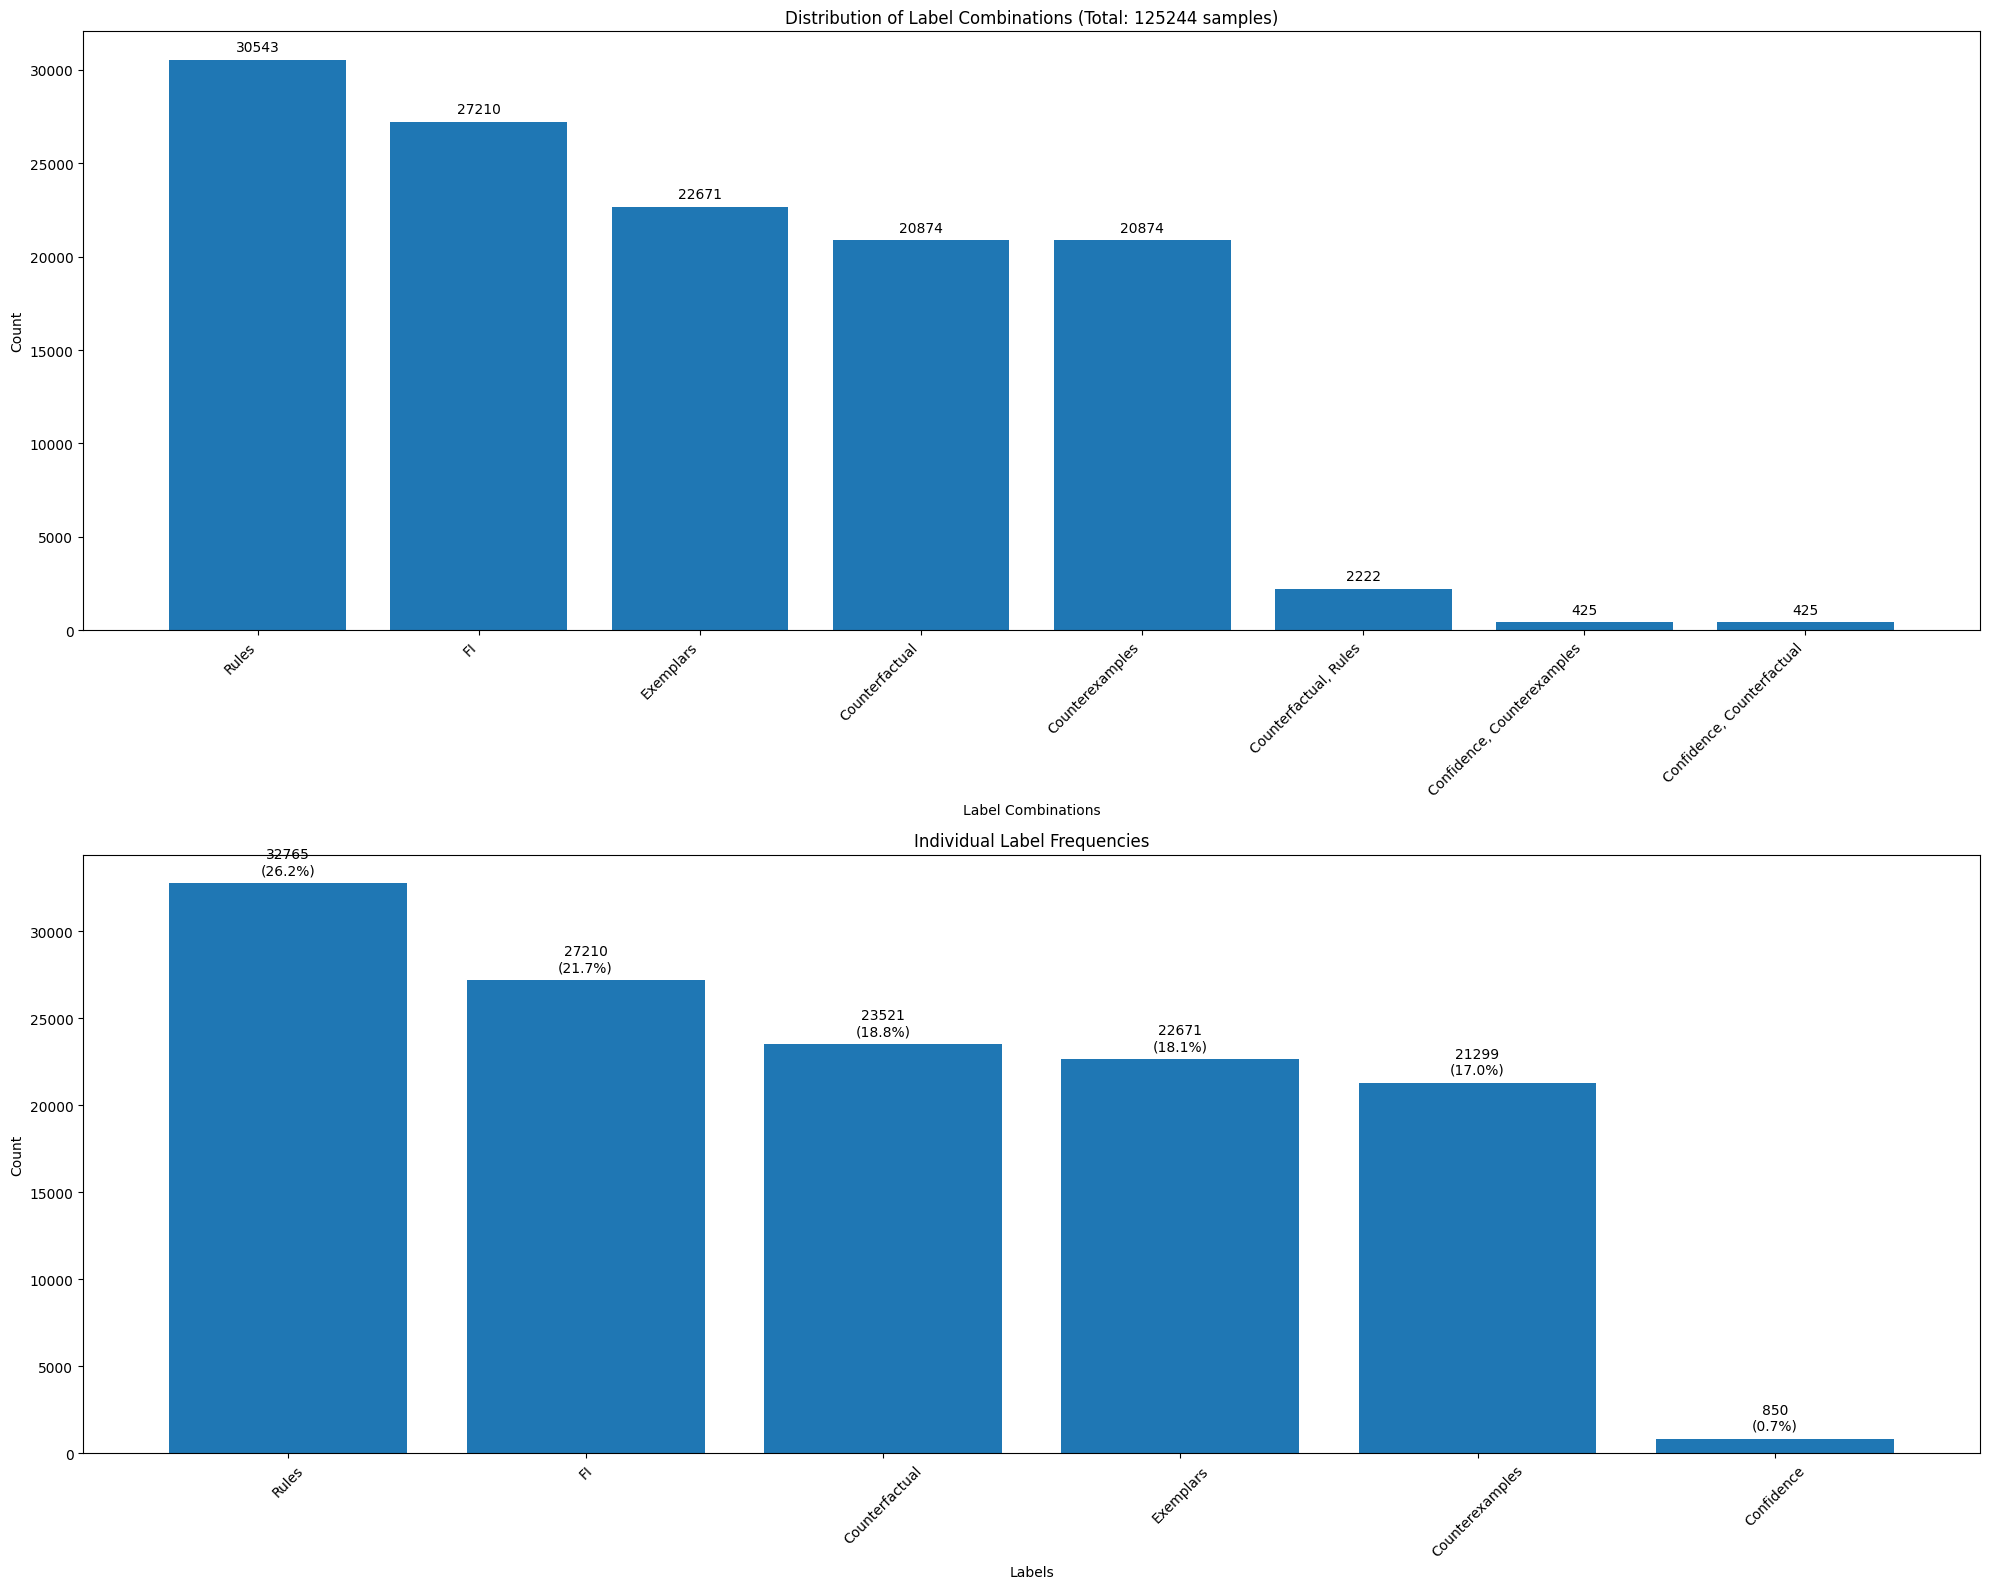

MULTI-LABEL DISTRIBUTION SUMMARY
Total samples: 125244
Total unique combinations: 8
Most common combination: Rules (30543 samples, 24.4%)

Top 10 combinations:
  Rules: 30543 (24.4%)
  FI: 27210 (21.7%)
  Exemplars: 22671 (18.1%)
  Counterfactual: 20874 (16.7%)
  Counterexamples: 20874 (16.7%)
  Counterfactual, Rules: 2222 (1.8%)
  Confidence, Counterexamples: 425 (0.3%)
  Confidence, Counterfactual: 425 (0.3%)


In [12]:
target_columns = ["suggested_explanation_Rules", "suggested_explanation_Exemplars", 
                  "suggested_explanation_FI", "suggested_explanation_Counterexamples", 
                  "suggested_explanation_Counterfactual", "suggested_explanation_Confidence"]

results = analyze_multilabel_distribution(df, target_columns)

# Covertype

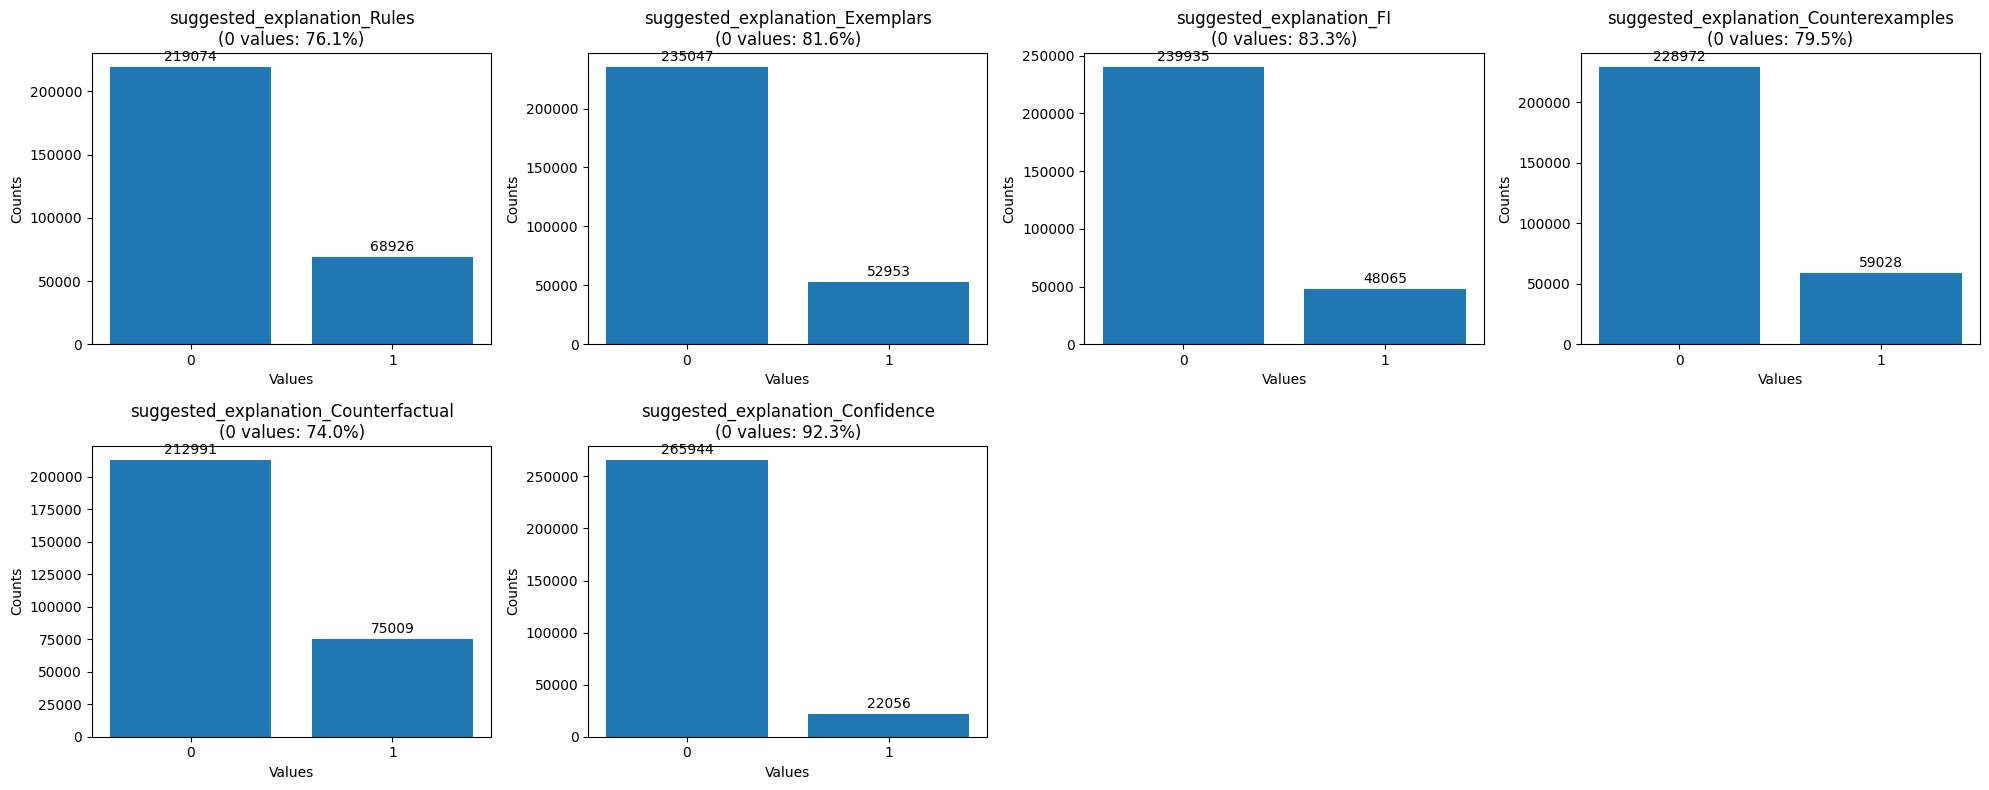

In [13]:
df = pd.read_csv("./data/train_covertype.csv")
counter = measure_balance(df[target_columns])

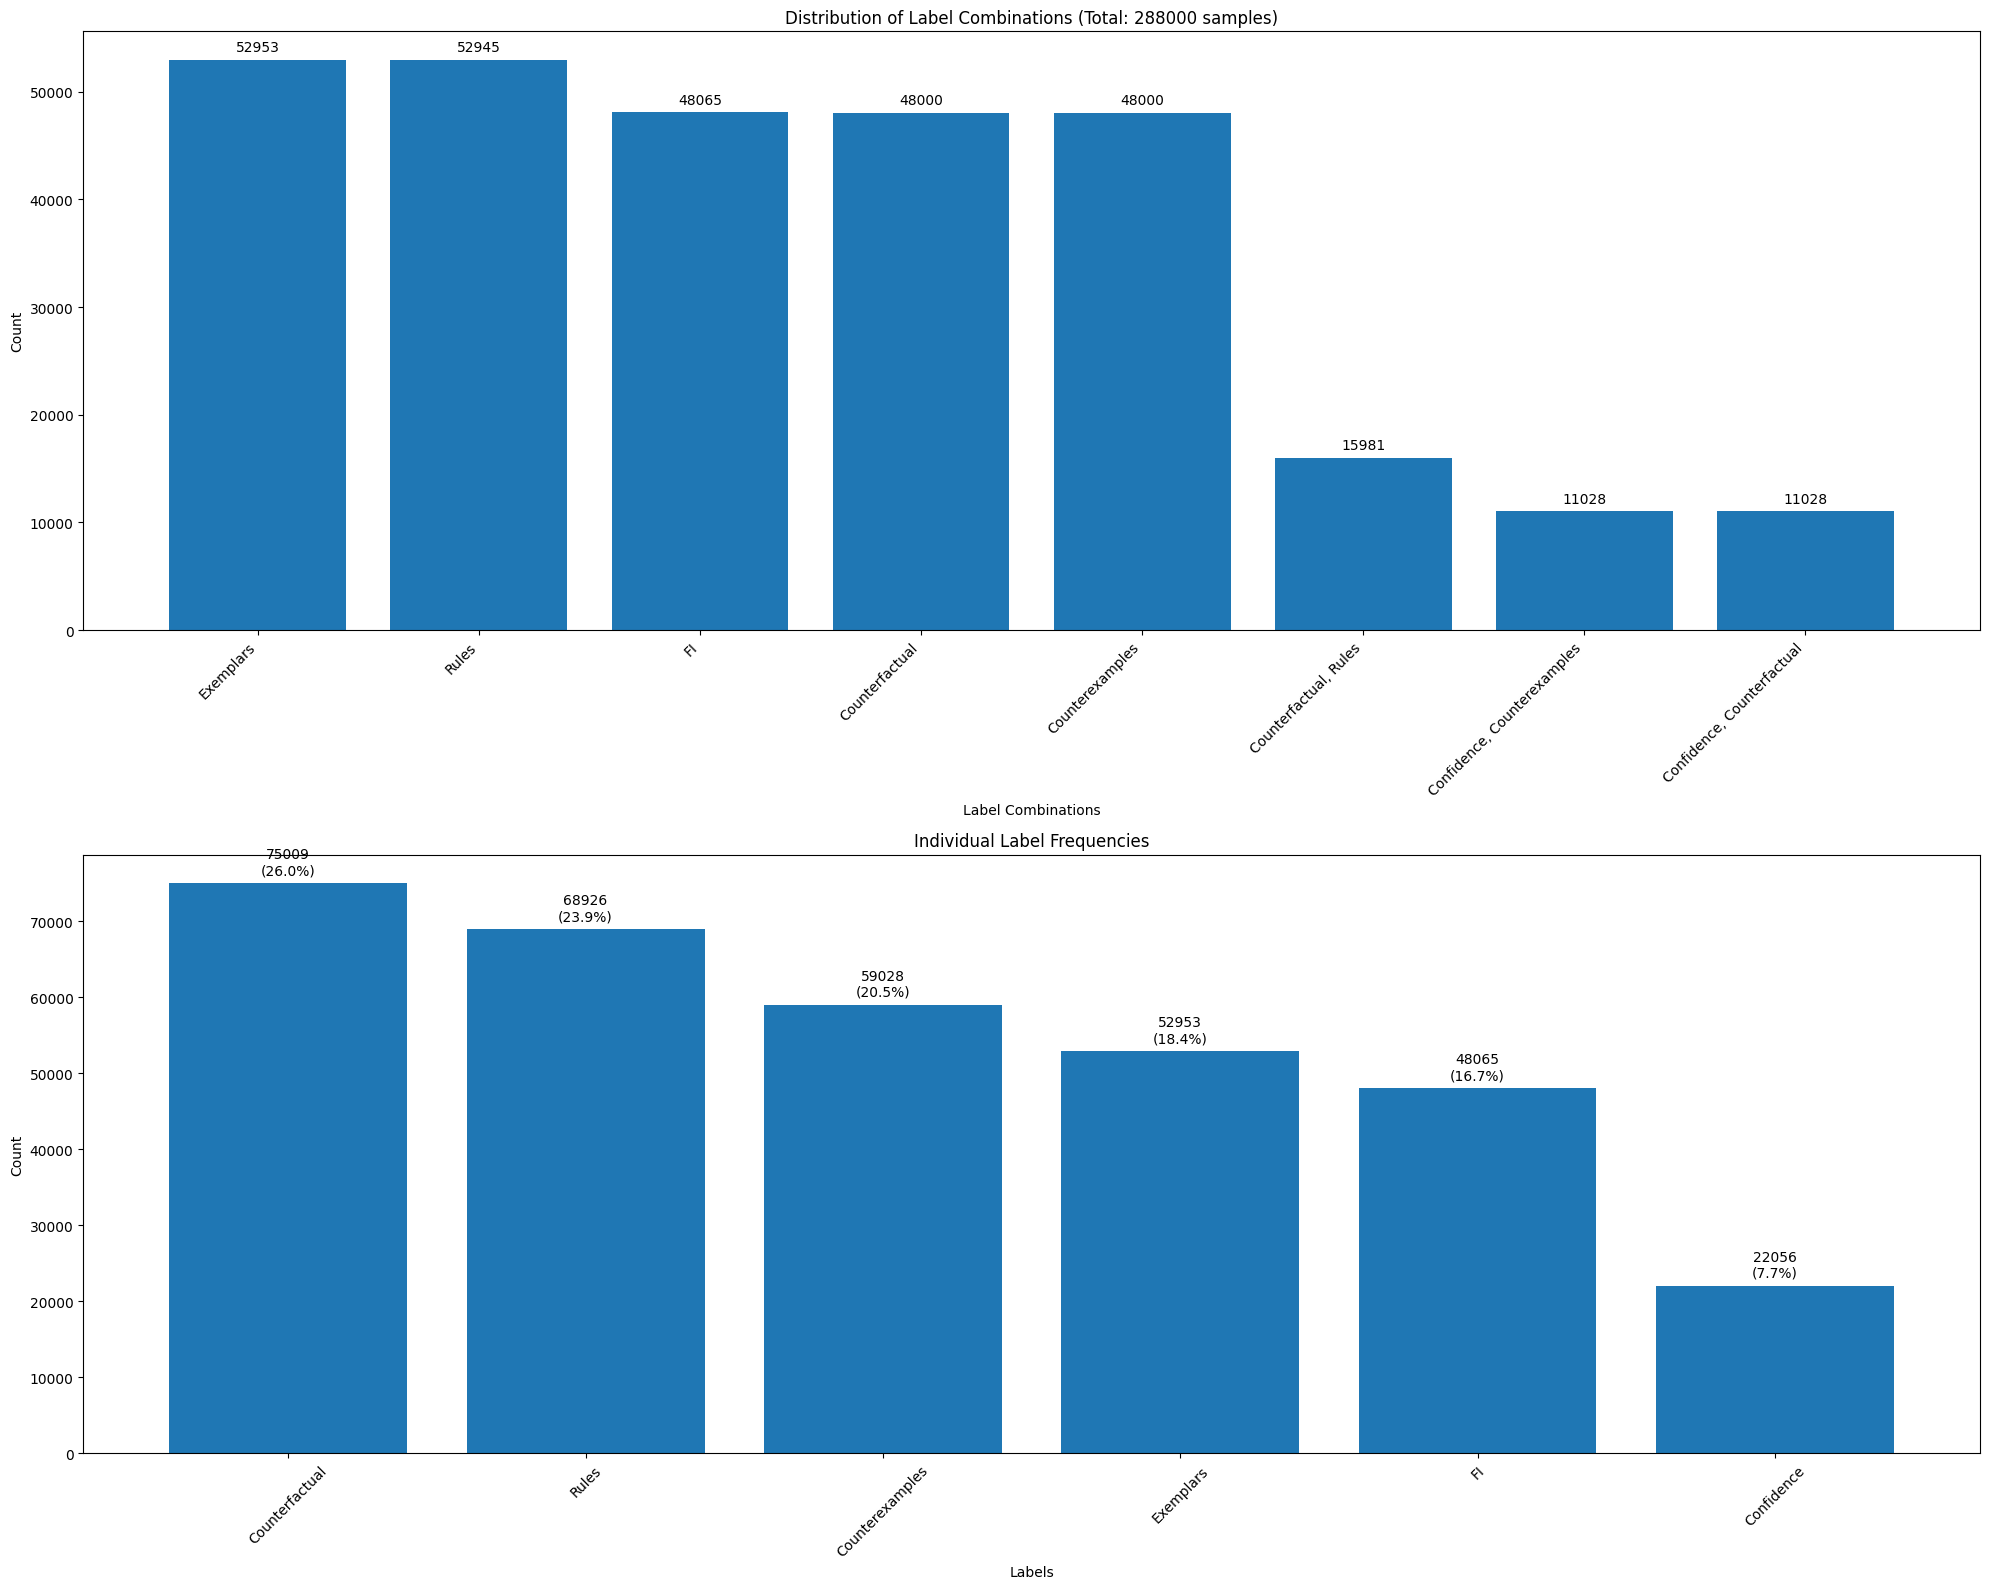

MULTI-LABEL DISTRIBUTION SUMMARY
Total samples: 288000
Total unique combinations: 8
Most common combination: Exemplars (52953 samples, 18.4%)

Top 10 combinations:
  Exemplars: 52953 (18.4%)
  Rules: 52945 (18.4%)
  FI: 48065 (16.7%)
  Counterfactual: 48000 (16.7%)
  Counterexamples: 48000 (16.7%)
  Counterfactual, Rules: 15981 (5.5%)
  Confidence, Counterexamples: 11028 (3.8%)
  Confidence, Counterfactual: 11028 (3.8%)


In [14]:
target_columns = ["suggested_explanation_Rules", "suggested_explanation_Exemplars", 
                  "suggested_explanation_FI", "suggested_explanation_Counterexamples", 
                  "suggested_explanation_Counterfactual", "suggested_explanation_Confidence"]

results = analyze_multilabel_distribution(df, target_columns)

# Letter

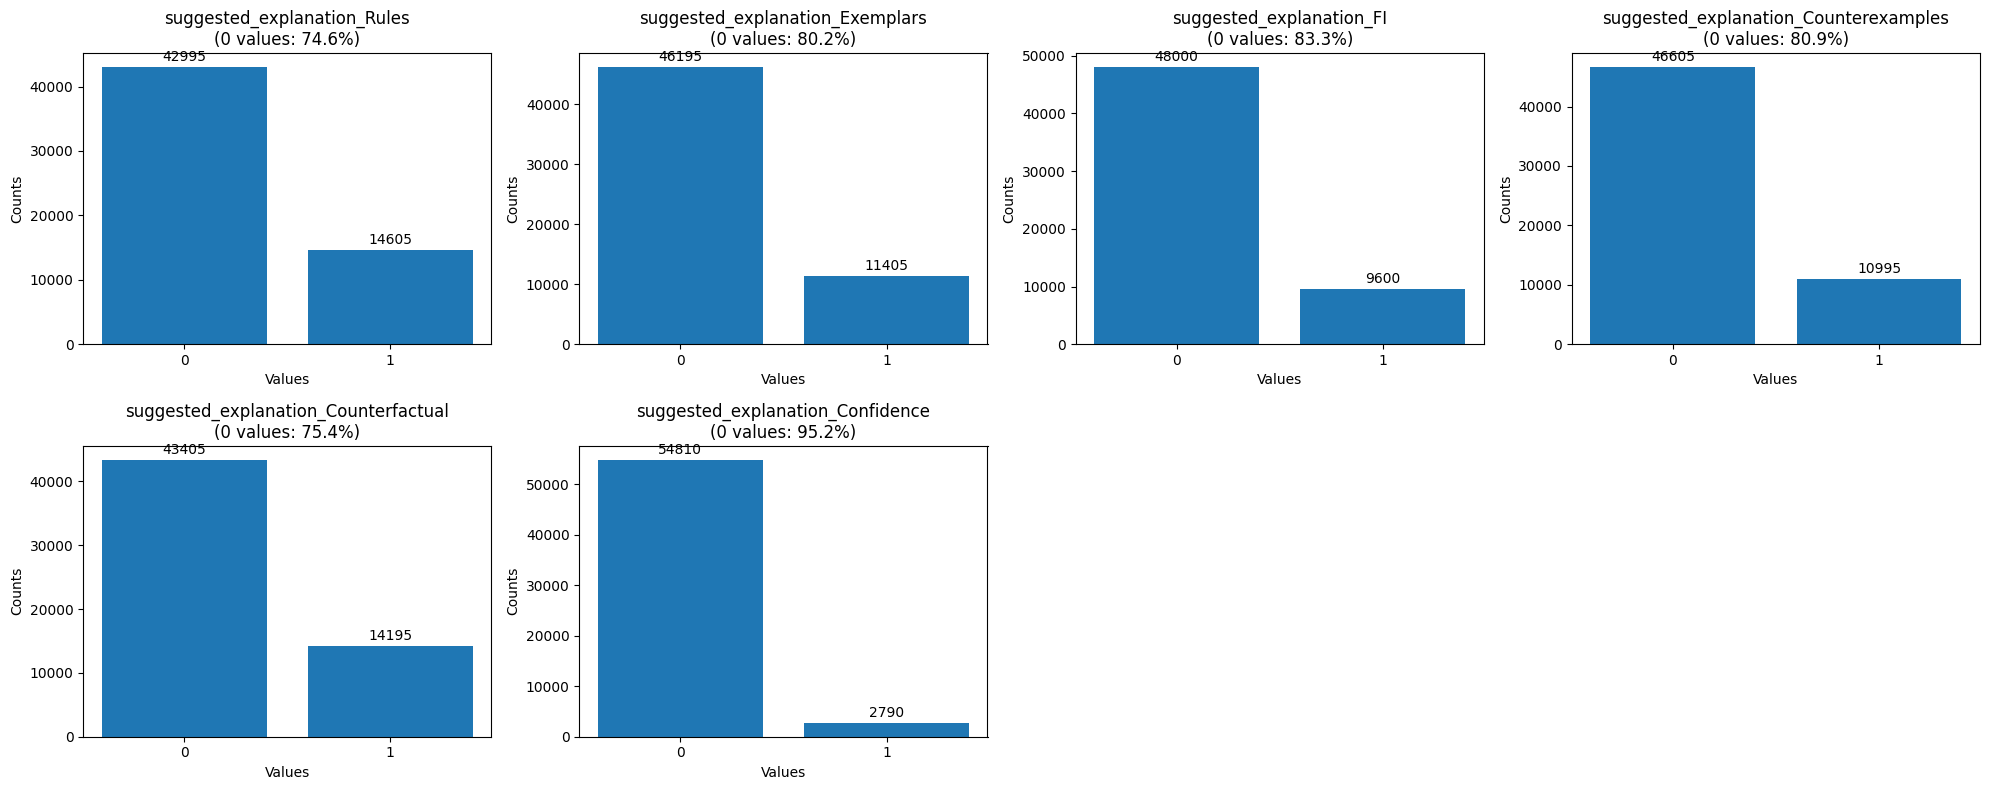

In [15]:
df = pd.read_csv("./data/train_letter.csv")
counter = measure_balance(df[target_columns])

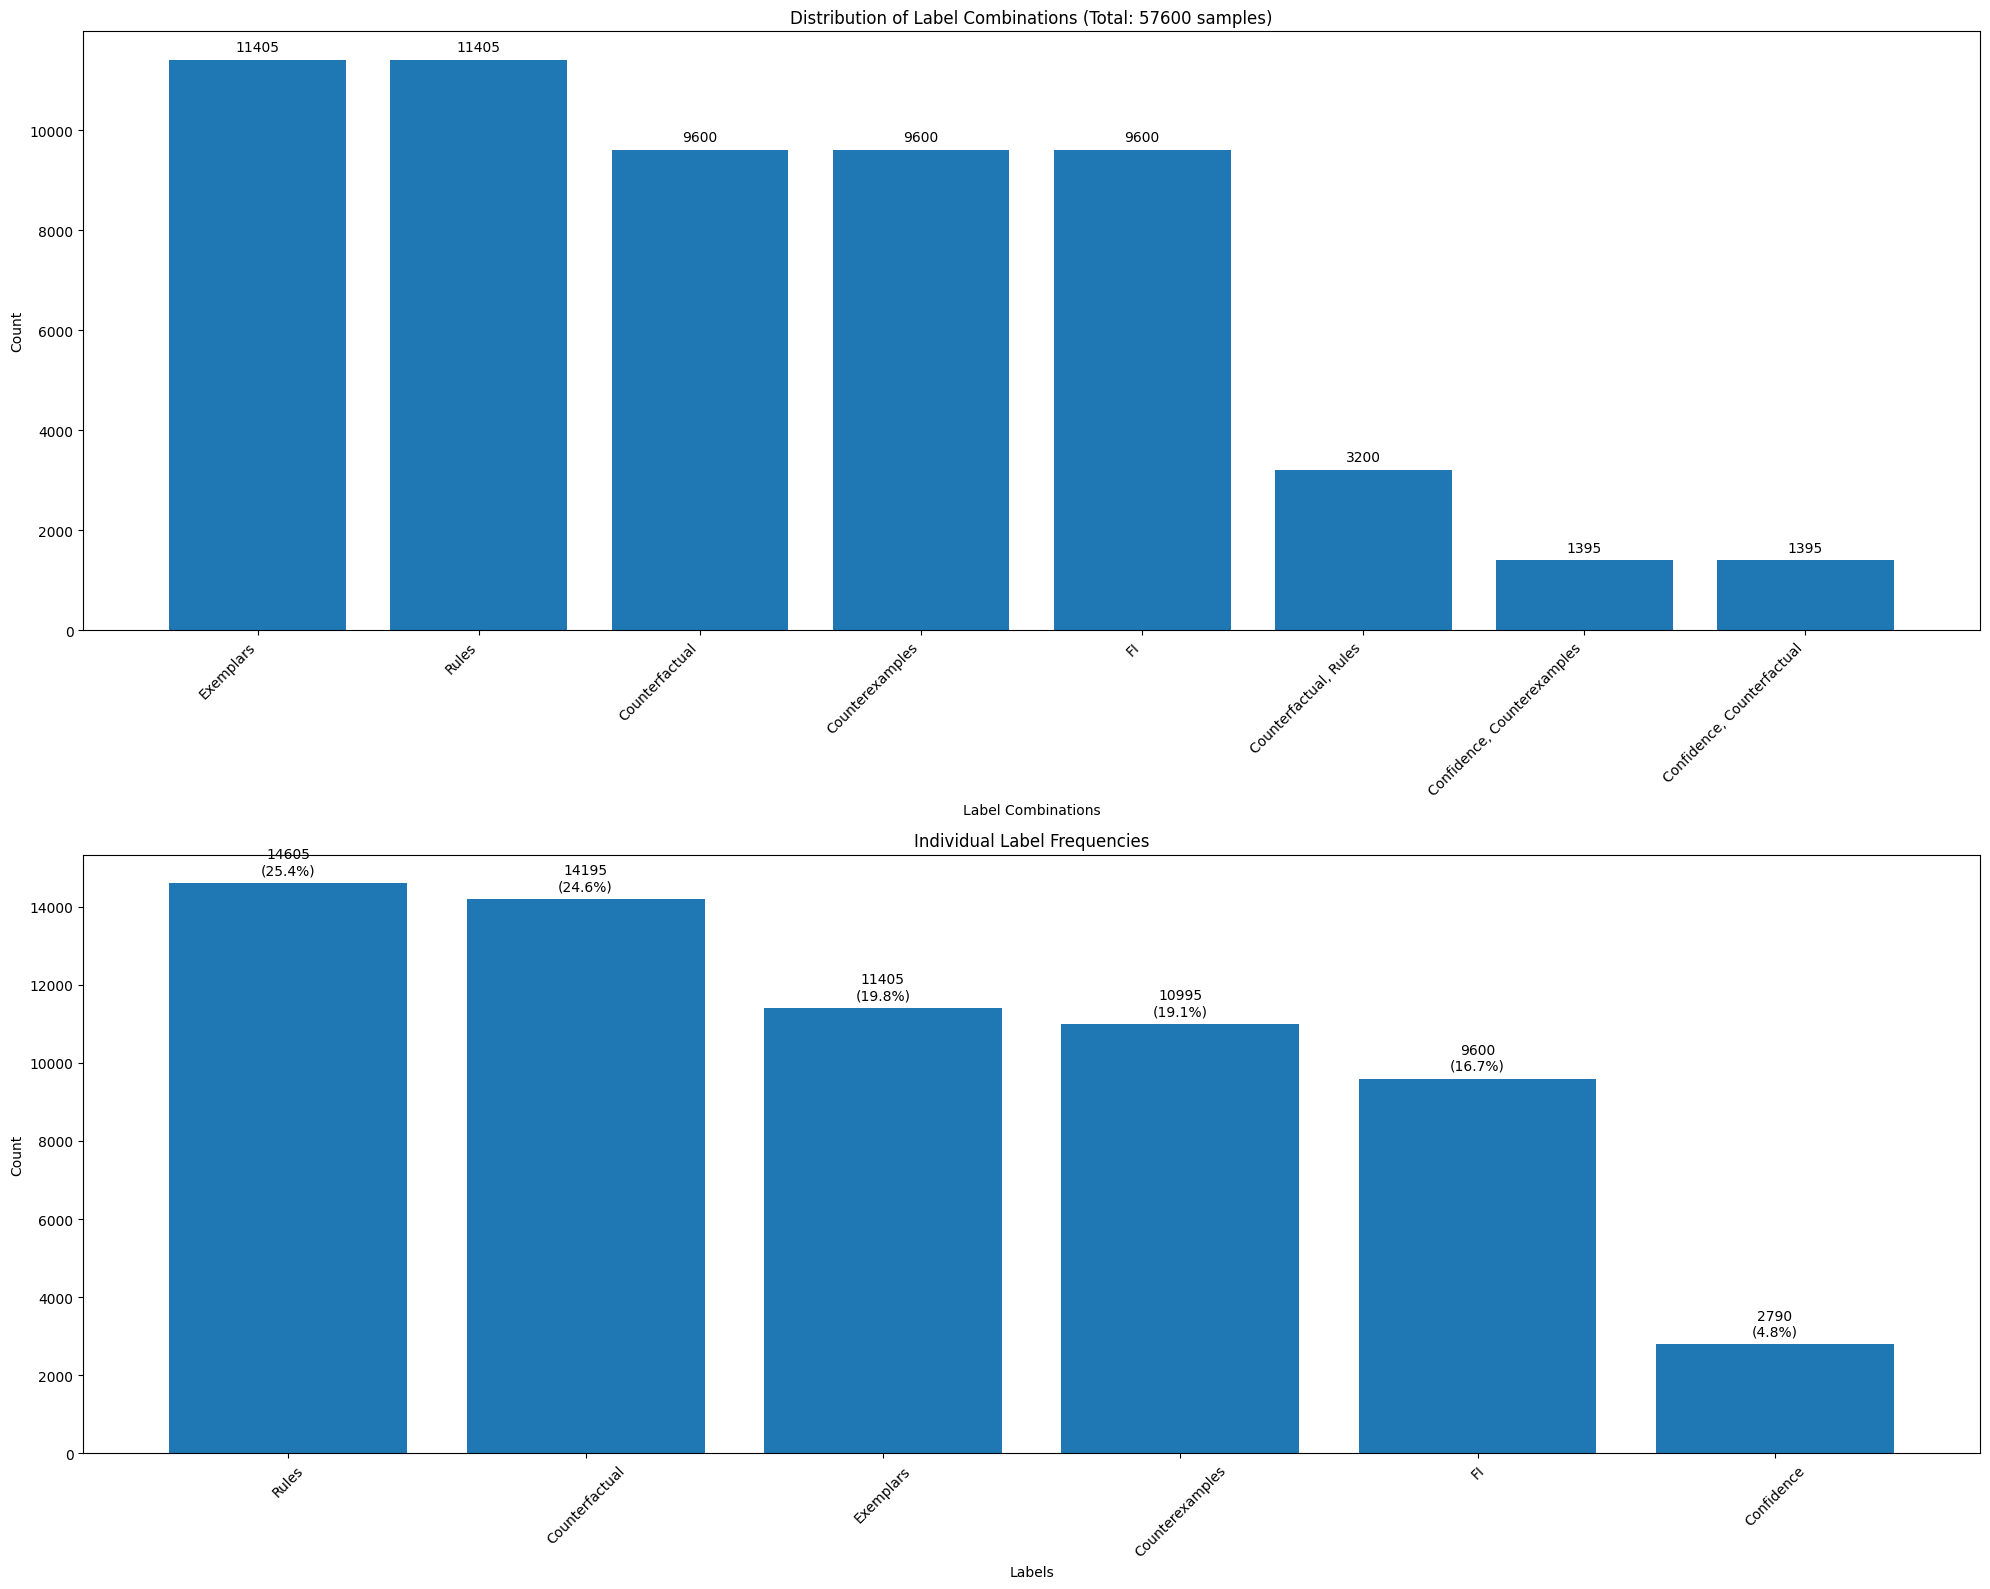

MULTI-LABEL DISTRIBUTION SUMMARY
Total samples: 57600
Total unique combinations: 8
Most common combination: Exemplars (11405 samples, 19.8%)

Top 10 combinations:
  Exemplars: 11405 (19.8%)
  Rules: 11405 (19.8%)
  Counterfactual: 9600 (16.7%)
  Counterexamples: 9600 (16.7%)
  FI: 9600 (16.7%)
  Counterfactual, Rules: 3200 (5.6%)
  Confidence, Counterexamples: 1395 (2.4%)
  Confidence, Counterfactual: 1395 (2.4%)


In [16]:
target_columns = ["suggested_explanation_Rules", "suggested_explanation_Exemplars", 
                  "suggested_explanation_FI", "suggested_explanation_Counterexamples", 
                  "suggested_explanation_Counterfactual", "suggested_explanation_Confidence"]

results = analyze_multilabel_distribution(df, target_columns)